In [20]:
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
plt.style.use('ggplot')
%matplotlib inline

plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)
plt.rc('legend', fontsize=14)

import os.path as osp
import torch


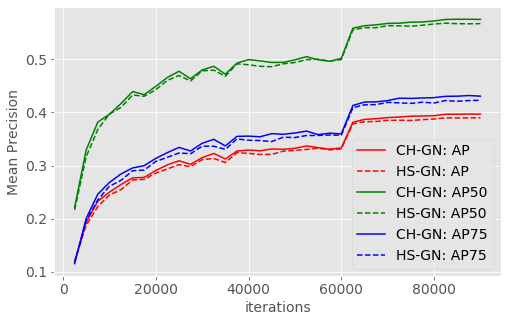

In [32]:
# plot validation accuracy curves on minival set

root_path1 = "../training_dir/packdet_R_50_FPN_1x_fe-128-12-2_m4_sep"
root_path2 = "../training_dir/packdet_R_50_FPN_1x_fe-128-12-2_m4-nsp_sep"
iterations = list(range(2500, 90001, 2500))

def load_val_results(root_path, iterations):
    results = {
        'AP': [],
        'AP50': [],
        'AP75': [],
        'APs': [],
        'APm': [],
        'APl': []
    }
    x = []
    for i, it in enumerate(iterations):
        model_path = osp.join(root_path, 
            'inference_model_{}/coco_2014_minival/coco_results.pth'.format(str(it).zfill(7)))
        # print(model_path)
        if osp.exists(model_path):
            result = torch.load(model_path)
            result = result.results['bbox']
            # print(it, result)
            for key, value in result.items():
                results[key].append(value)
            x.append(it)
        else:
            print(model_path, 'does not exist')
    return results, x

results1, iterations1 = load_val_results(root_path1, iterations)
results2, iterations2 = load_val_results(root_path2, iterations)

keys = ['AP', 'AP50', 'AP75']
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
legends = []
fig = plt.figure(figsize=(8, 8/1.618))
for i, key in enumerate(keys):
    plt.plot(iterations1, results1[key], colors[i]+'-')
    plt.plot(iterations2, results2[key], colors[i]+'--')
    legends.extend(['CH-GN: %s'%key, 'HS-GN: %s'%key])
plt.legend(legends)
plt.xlabel('iterations')
plt.ylabel('Mean Precision')

plt.savefig('ch_gn_val_curves.png')
plt.show()
plt.close()

# pdf = PdfPages(r"ch_gn_val_curves.pdf")
# pdf.savefig(fig)
# plt.show()
# plt.close()

# pdf.close()
# pdf = None

data = dict(iterations1=iterations1, 
            results1=results1, 
            iterations2=iterations2, 
            results2=results2
           )
with open('ch_gn_val_curves.json', 'w') as f:
    json.dump(data, f)

In [1]:
import json
with open('ch_gn_val_curves.json', 'r') as f:
    data = json.load(f)
print(data)

{'iterations1': [2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000, 22500, 25000, 27500, 30000, 32500, 35000, 37500, 40000, 42500, 45000, 47500, 50000, 52500, 55000, 57500, 60000, 62500, 65000, 67500, 70000, 72500, 75000, 77500, 80000, 82500, 85000, 87500, 90000], 'results1': {'AP': [0.11861755694999492, 0.19358456521840736, 0.23264395621749576, 0.24991296022143178, 0.26427095840019127, 0.2766988378476276, 0.277518783537103, 0.29068129938761866, 0.30120877726993295, 0.3088735428273739, 0.3022809813685186, 0.31468558662219487, 0.3227353684660423, 0.3123534339505155, 0.32715886615932616, 0.32910901670512627, 0.32765656172776025, 0.33127047077790944, 0.33042379570425423, 0.33243180934972444, 0.3368395406933369, 0.33365841896395354, 0.33069265897928507, 0.3330994364568892, 0.3815535046500251, 0.38675214072051933, 0.3881298796792052, 0.3902837516425273, 0.39125433125076275, 0.39277365415134646, 0.3932966863260093, 0.39371805433188123, 0.3965574705253624, 0.3966012169611235, 0.396881958594